# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Цели исследования:**
Установить параметры, влияющие на формирование рыночной стоимости объектов недвижимости.

**Описание данных:**
Датасет с информацией об объявлениях о продаже недвижимости: дата размещения, стоимость, этаж, тип жилья, удаление от центра города и аэропорта и т.д.

**План работы:**

1 ОТКРОЕМ ФАЙЛ С ДАННЫМИ И ИЗУЧИМ ОБЩУЮ ИНФОРМАЦИЮ

1.1 Импортируем библиотеки pandas и numpy, считаем данные из csv-файла в датафрейм, сохраним в переменную data и выведем ее на экран.

1.2 Выведем основную информацию о датафрейме.

1.3 Построим общую гистограмму для всех числовых столбцов таблицы.

2 ПРЕДОБРАБОТКА ДАННЫХ

2.1 Найдем и изучим пропущенные значения в столбцах.

2.2 Рассмотрим типы данных в каждом столбце.

2.3 Изучим уникальные значения в столбце с названиями и устраните неявные дубликаты.

2.4 Найдем и устраним редкие и выбивающиеся значения.

3 ПОСЧИТАЕМ И ДОБАВИМ В ТАБЛИЦУ НОВЫЕ СТОЛБЦЫ

4 ПРОВЕДЕМ ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ

4.1 Изучение ключевых параметров объектов.

4.2 Изучим, как быстро продавались квартиры.

4.3 Изучим, как цена зависит от ключевых факторов.

4.4 Исследуем зависимость цены от населенного пункта.

4.5 Определим, как стоимость объектов зависит от расстояния до центра Санкт-Петербурга.

5 ОБЩИЙ ВЫВОД

### Откроем файл с данными и изучим общую информацию.

**1.1 Импортируем библиотеки pandas и numpy, считаем данные из csv-файла в датафрейм, сохраним в переменную data и выведем ее на экран.**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

import numpy as np

In [3]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**1.2 Выведем основную информацию о датафрейме.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**1.3 Построим общую гистограмму для всех числовых столбцов таблицы.**

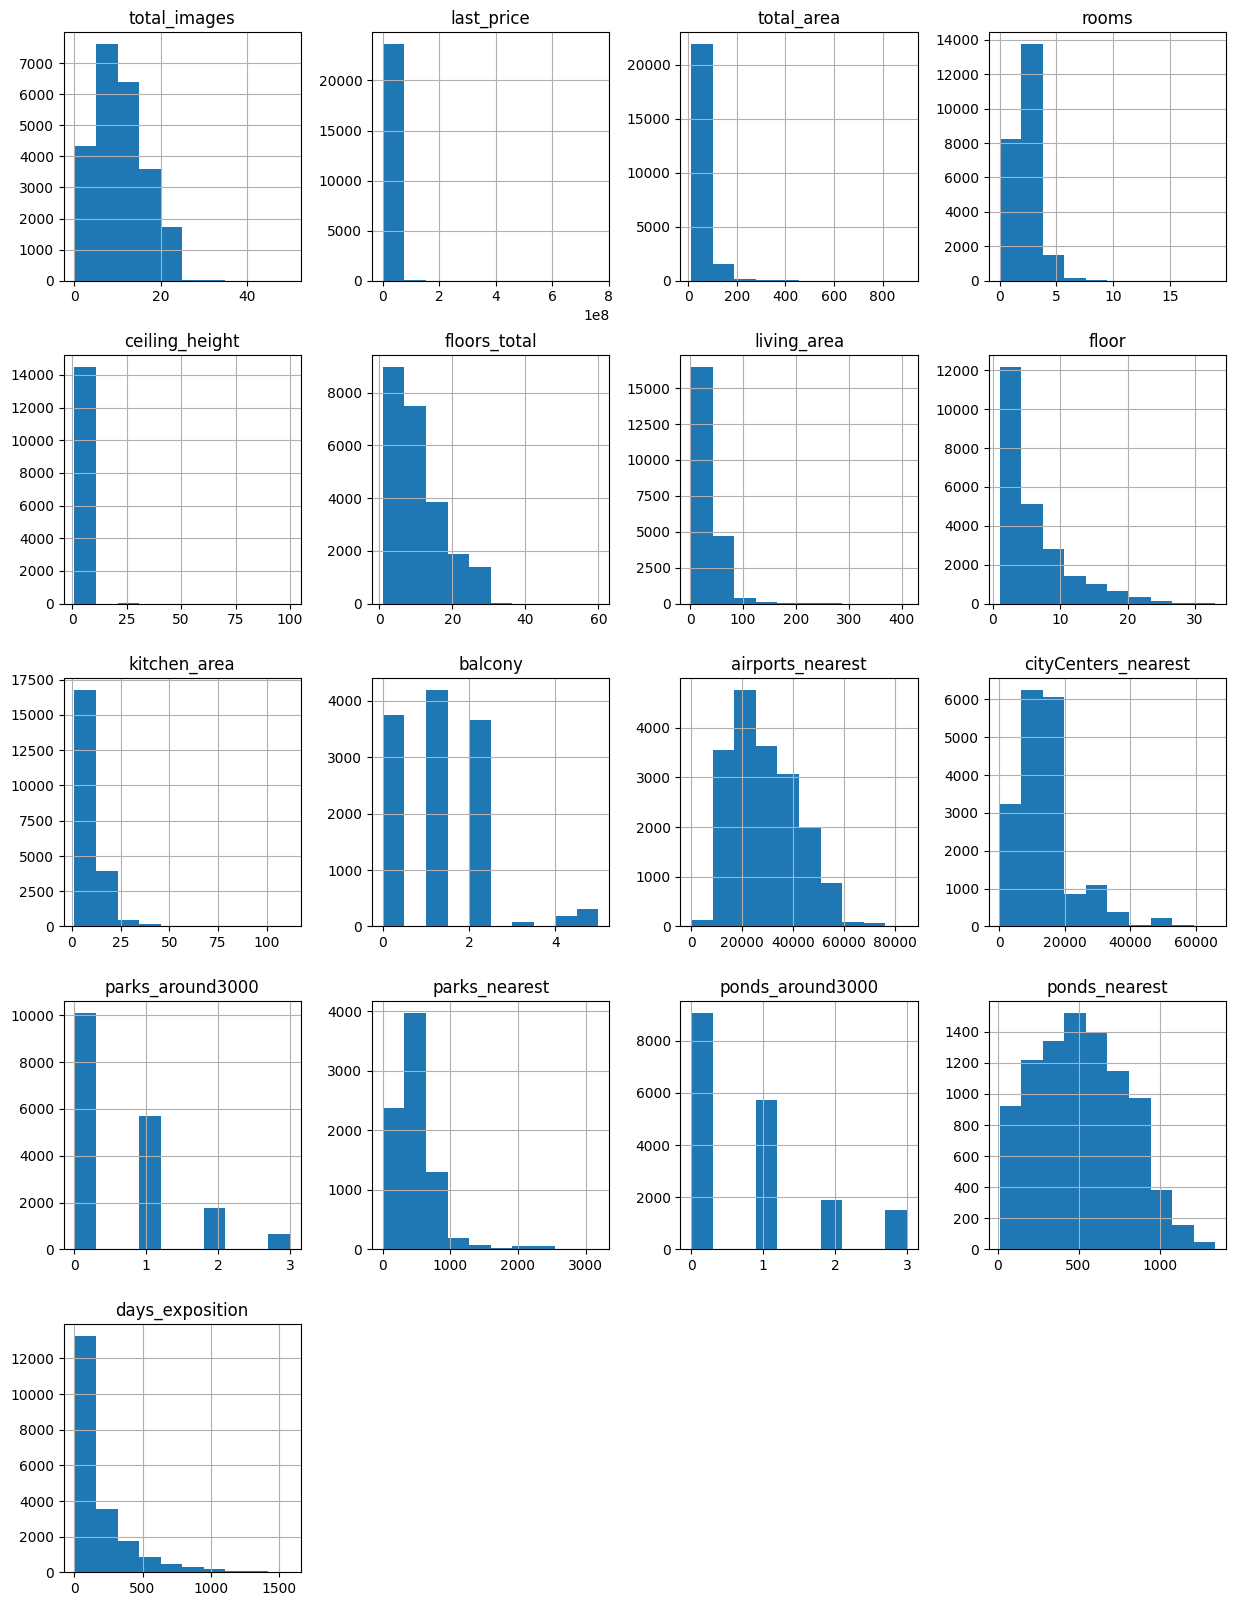

In [5]:
data.hist(figsize=(15, 20));

### Предобработка данных

**2.1 Найдем и изучим пропущенные значения в столбцах.**

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
# Заменим пропущенные значения в столбце ceiling_height медианными значениями:

data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [8]:
# Приравняем пропущенные значения столбца floors_total к соответствующим значениям столбца floor:

data['floors_total'] = data['floors_total'].fillna(data['floor'])

In [9]:
# Рассчитаем пропущенные значения столбцов living_area и kitchen_area, как пропорцию от общей площади:

data['living_area'] = data['living_area'].fillna(data['total_area'] * 0.6)

data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * 0.3)

In [10]:
# Заменим пропущенные значения в столбце is_apartment на False:

data['is_apartment'] = data['is_apartment'].fillna(False)

In [11]:
# Заменим пропущенные значения в столбцах balcony, parks_around3000 и ponds_around3000 на ноль:

data['balcony'] = data['balcony'].fillna(0)

data['parks_around3000'] = data['parks_around3000'].fillna(0)

data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

**Вывод:**
Пропуски в столбцах ceiling_height, floors_total, locality_name скорее всего связаны с невнимательностью лиц, размещавших объявление.

Пропуски в столбцах living_area и kitchen_area, по крайней мере, в ряде случаев могут быть также связаны с тем, что объектом продажи являются квартиры-студии, в которых сложно выделить жилое и кухонное пространства.

Пропуски в столбце is_apartment можно объяснить тем, что многие посчитали необходимым делать какую-либо пометку только в тех случаях, когда квартира является апартаментами.

Схожим образом, пропуски в balcony вероятно свидетельствуют об отсутствии балкона в данных квартирах.

Пропуски в столбцах airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000 и ponds_nearest могут указывать о полном отсутствии объектов заданного типа в ближайшем окружении заданной квартиры.

Пропуски в days_exposition с наибольшей вероятностью указывают, что квартира не продана, на данный момент.

Также, причиной возникновения всех этих пропусков могла быть техническая проблема.

**2.2 Рассмотрим типы данных в каждом столбце.**

In [12]:
# Изменим тип данных в столбцах last_price, floors_total, balcony, parks_around3000 и ponds_around3000 на int:

data['last_price'] = data['last_price'].astype(int)

data['floors_total'] = data['floors_total'].astype(int)

data['balcony'] = data['balcony'].astype(int)

data['parks_around3000'] = data['parks_around3000'].astype(int)

data['ponds_around3000'] = data['ponds_around3000'].astype(int)

In [13]:
# Приведем дату публикации в столбце first_day_exposition к более читаемому формату:

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],
format='%Y.%m.%dT%H:%M:%S')

**Комментарий:**
Значения в столбцах last_price, floors_total, balcony, parks_around3000 и ponds_around3000 стоит заменить целочисленными для ясности отображения и простоты дальнейшей работы с ними.

Столбец first_day_exposition также приведен к более читаемому виду.

**2.3	Изучим уникальные значения в столбце с названиями и устраните неявные дубликаты.**

In [14]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [15]:
# Заменим сначала "ё" на "е", а затем все слова, обозначающие тип населенного пункта, на пустые кавычки, чтобы получить
# очищенные названия локаций в новом столбце locality_name_clear:

data['locality_name_clear'] = data['locality_name'].str.replace('ё', 'е')

data['locality_name_clear'] = data['locality_name_clear'].str.replace('село ','')

data['locality_name_clear'] = data['locality_name_clear'].str.replace('поселок ','')

data['locality_name_clear'] = data['locality_name_clear'].str.replace('городской ','')

data['locality_name_clear'] = data['locality_name_clear'].str.replace('деревня ','')

data['locality_name_clear'] = data['locality_name_clear'].str.replace('городского типа ','')

data['locality_name_clear'] = data['locality_name_clear'].str.replace('садовое товарищество ','')

data['locality_name_clear'] = data['locality_name_clear'].str.replace('некоммерческое ','')

data['locality_name_clear'] = data['locality_name_clear'].str.replace('станции ','')

data['locality_name_clear'] = data['locality_name_clear'].str.replace('при железнодорожной ','')

data['locality_name_clear'] = data['locality_name_clear'].str.replace('коттеджный ','')

data['locality_name_clear'] = data['locality_name_clear'].str.replace('имени ','')

data['locality_name_clear'] = data['locality_name_clear'].str.replace('садоводческое товарищество ','')

In [16]:
# Проверим список уникальных значений нового столбца:

data['locality_name_clear'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

**2.4 Найдем и устраним редкие и выбивающиеся значения.**

In [17]:
# Применим ко всем столбцам датасета методы value_counts, unique, sort_values или построим гистограммы:

data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

In [18]:
# Создадим сводную таблицу, чтобы определить среднее число студий, приходящихся на строки с нулем комнат:

rooms_pivot = data.pivot_table(index='rooms', values='studio')

rooms_pivot

,studio
rooms,
0,0.700508
1,0.001367
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.000000


In [19]:
# Удалим из датасета все строки с количеством комнат больше семи:

data = data[(data['rooms'] <= 7)]

In [20]:
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.62,
         3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,   2.79,
         2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,   4.7 ,
         2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,   3.35,
         2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,   3.83,
         3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,   3.85,
         3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,  32.  ,
         3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.16,   3.26,
      

In [21]:
# Перемножим все значения столбца ceiling_height, равные или большие двадцати метров, на 0.1:

data.loc[data['ceiling_height'] >= 20.00, 'ceiling_height'] *= 0.1

In [22]:
# Выведем обновленный список уникальных значений столбца ceiling_height:

data['ceiling_height'].unique()

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,  2.79,
        2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,  2.4 ,
        3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,  3.57,
        2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,  3.75,
        2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,  4.8 ,
        4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,  8.  ,
        3.16,  3.26,  3.34,  2.81,  3.44,  2.97,  4.37,  2.68,  3.22,
        3.27,  4.1 ,  2.93,  3.46,  2.4 ,  3.47,  3.33,  3.63,  3.14,
        3.32,  1.2 ,

In [23]:
# Подсчитаем, сколько раз в датасете встречаются кажущиеся аномальными слишком большие или маленькие значения столбца ceiling_height:

data.loc[(data['ceiling_height'] == 8.00)]['ceiling_height'].count()

3

In [24]:
data.loc[(data['ceiling_height'] == 10.30)]['ceiling_height'].count()

1

In [25]:
data.loc[(data['ceiling_height'] == 1.20)]['ceiling_height'].count()

1

In [26]:
data.loc[(data['ceiling_height'] == 1.00)]['ceiling_height'].count()

1

In [27]:
data.loc[(data['ceiling_height'] == 14.00)]['ceiling_height'].count()

1

In [28]:
# Удалим из датасета те из них, что встречаются всего лишь один раз:

data = data[(data['ceiling_height'] != 10.30) & (data['ceiling_height'] != 14.00) & (data['ceiling_height'] != 10.00) & (data['ceiling_height'] != 1.00) & \
            (data['ceiling_height'] != 1.20)]

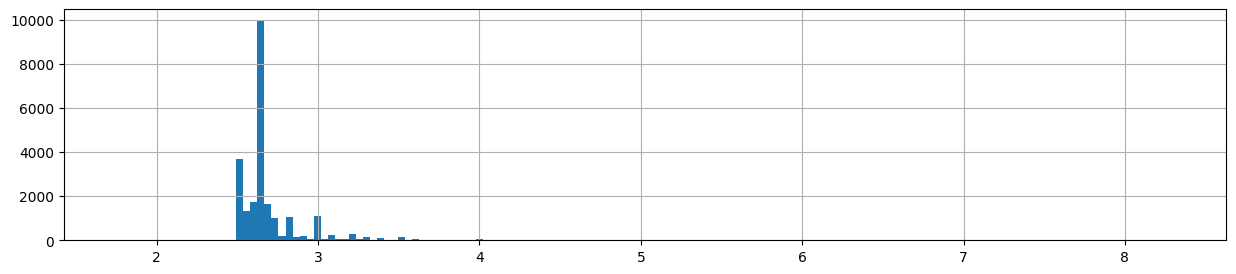

In [29]:
data['ceiling_height'].hist(bins=150, figsize=(15,3));

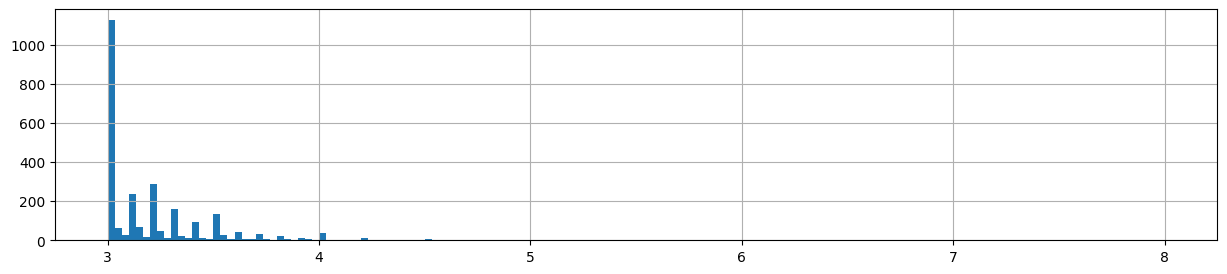

In [30]:
data['ceiling_height'].hist(bins=150, figsize=(15,3), range=(3,8));

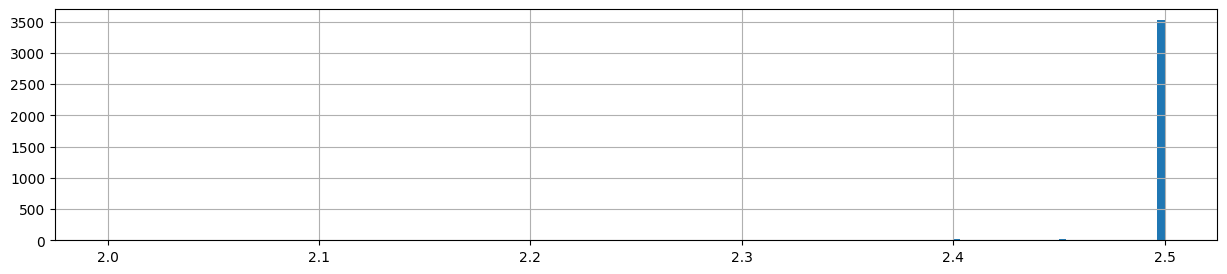

In [31]:
data['ceiling_height'].hist(bins=150, figsize=(15,3), range=(2,2.5));

In [32]:
# Удалим из датасета все строки с высотой потолка меньше 2.5 и больше 3.5-й метра:

data = data[(data['ceiling_height'] >= 2.50) & (data['ceiling_height'] <= 3.50)]

In [33]:
data['total_images'].value_counts()

10    1777
9     1703
20    1644
8     1560
7     1494
6     1462
11    1353
5     1278
12    1208
0     1039
13    1000
14     971
4      967
15     933
1      861
3      757
16     748
17     635
18     629
2      627
19     593
23      16
21      12
24       8
22       8
26       5
32       4
28       4
29       3
50       2
27       2
30       2
35       2
31       2
42       1
25       1
39       1
37       1
Name: total_images, dtype: int64

In [34]:
data['last_price'].sort_values()

8793         12190
14911       430000
17456       430000
16274       440000
16219       450000
           ...    
22831    289238400
15651    300000000
1436     330000000
14706    401300000
12971    763000000
Name: last_price, Length: 23313, dtype: int64

In [35]:
# Подсчитаем, сколько раз в датасете встречаются необычно большое и необычно маленькое значения столбца last_price:

data.loc[(data['last_price'] == 763000000)]['last_price'].count()

1

In [36]:
data.loc[(data['last_price'] == 12190)]['last_price'].count()

1

In [37]:
# Удалим эти значения из датасета:

data = data[(data['last_price'] != 12190) & (data['last_price'] != 763000000)]

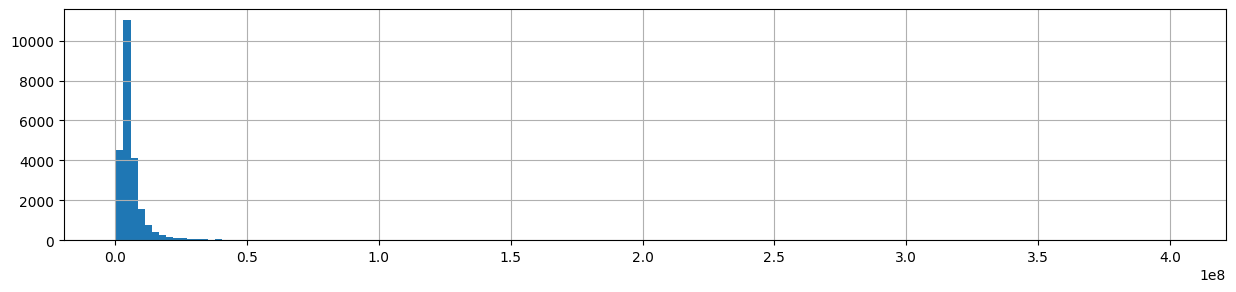

In [38]:
data['last_price'].hist(bins=150, figsize=(15,3));

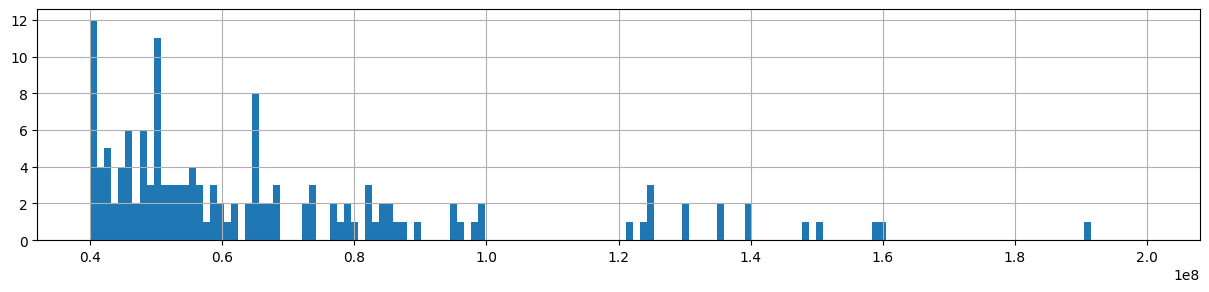

In [39]:
data['last_price'].hist(bins=150, figsize=(15,3), range=(40000000,200000000));

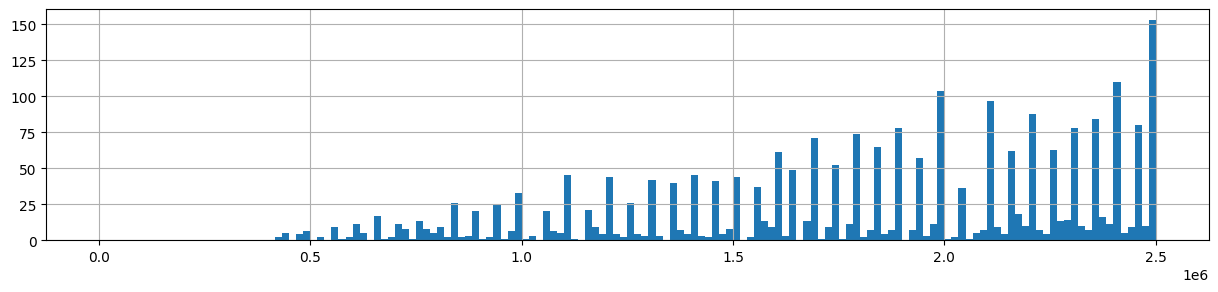

In [40]:
data['last_price'].hist(bins=150, figsize=(15,3), range=(0,2500000));

In [41]:
# Удалим из датасета все строки с ценой меньше одного и больше ста миллионов рублей:

data = data[(data['last_price'] >= 1000000) & (data['last_price'] <= 100000000)]

In [42]:
data['total_area'].value_counts()

45.00     405
42.00     372
60.00     341
31.00     335
44.00     335
         ... 
58.71       1
60.75       1
63.19       1
237.00      1
76.75       1
Name: total_area, Length: 2093, dtype: int64

In [43]:
data['total_area'].sort_values()

19904     12.0
19546     13.0
19807     13.0
17961     13.0
19558     13.2
         ...  
6221     470.3
660      483.9
6621     488.0
9826     494.1
4237     517.0
Name: total_area, Length: 23065, dtype: float64

In [44]:
# Удалим из датасета все строки с общей площадью меньше 20 и больше 250-ти кв. метров:

data = data[(data['total_area'] <= 250) & (data['total_area'] >= 20)]

In [45]:
data['floors_total'].value_counts()

5     5501
9     3736
16    1370
12    1358
10    1174
4     1122
25    1072
6      836
17     828
3      611
7      567
14     551
18     506
24     471
8      386
15     367
23     352
19     340
2      317
22     287
20     271
13     231
11     205
27     164
21     162
26     123
35      24
28      21
1       20
36       3
34       1
60       1
29       1
33       1
52       1
Name: floors_total, dtype: int64

In [46]:
# Удалим из датасета строки с встречающимися по одному разу необычно большими значениями столбца floors_total:

data = data[(data['floors_total'] != 60) & (data['floors_total'] != 52)]

In [47]:
data['living_area'].value_counts()

18.00    875
17.00    651
30.00    596
16.00    474
20.00    473
        ... 
42.12      1
28.31      1
16.32      1
15.96      1
48.18      1
Name: living_area, Length: 2127, dtype: int64

In [48]:
data['living_area'].sort_values()

21758      2.0
13915      2.0
3242       3.0
23574      3.0
17582      5.0
         ...  
7658     174.3
8634     175.0
681      180.0
3043     184.0
22907    200.0
Name: living_area, Length: 22979, dtype: float64

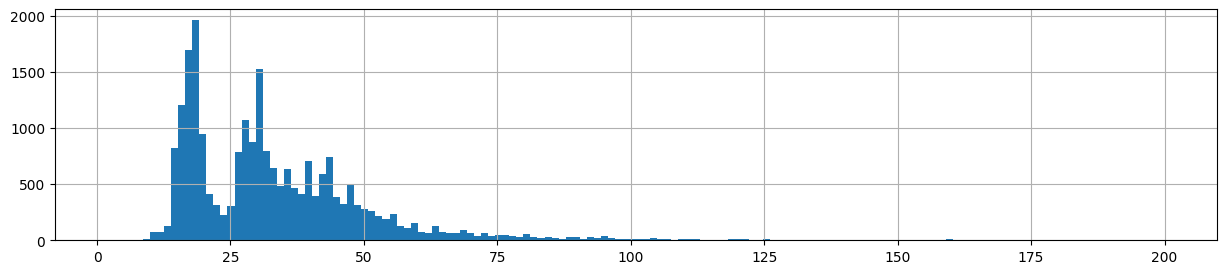

In [49]:
data['living_area'].hist(bins=150, figsize=(15,3));

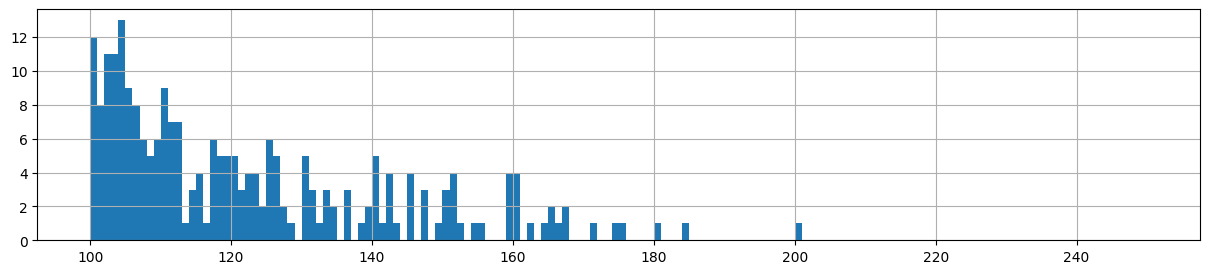

In [50]:
data['living_area'].hist(bins=150, figsize=(15,3), range=(100,250));

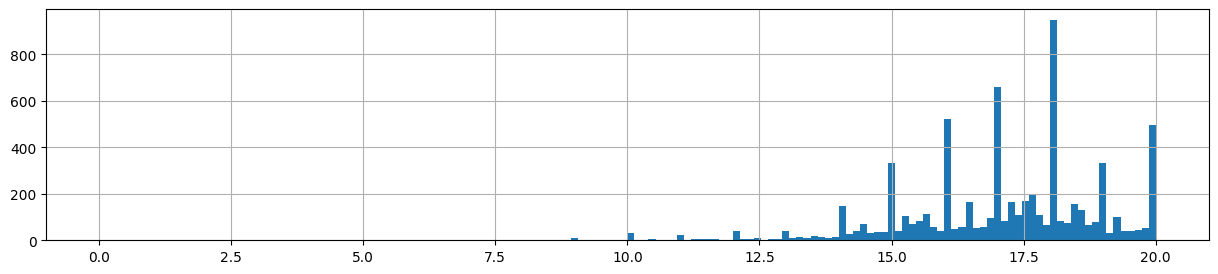

In [51]:
data['living_area'].hist(bins=150, figsize=(15,3), range=(0,20));

In [52]:
# Удалим из датасета все строки с жилой площадью меньше 13 и больше 160-ти кв. метров:

data = data[(data['living_area'] >= 13) & (data['living_area'] <= 160)]

In [53]:
data['floor'].value_counts()

2     3196
3     2920
1     2756
4     2667
5     2511
6     1265
7     1183
8     1065
9     1036
10     676
12     518
11     510
13     375
15     336
14     328
16     311
17     221
18     171
19     146
21     123
22     111
20     107
23      99
24      61
25      44
26      23
27      10
28       1
30       1
29       1
32       1
33       1
31       1
Name: floor, dtype: int64

In [54]:
data['kitchen_area'].unique()

array([25.  , 11.  ,  8.3 , ..., 21.55, 18.55, 24.09])

In [55]:
# Проверим, какой строке принадлежит необычно большое значение столбца kitchen_area:

data.loc[(data['kitchen_area'] == 107.00)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_clear
20215,2,85000000,249.7,2018-02-01,3,2.65,10,72.0,9,False,...,4,Санкт-Петербург,31532.0,4624.0,1,2218.0,2,99.0,26.0,Санкт-Петербург


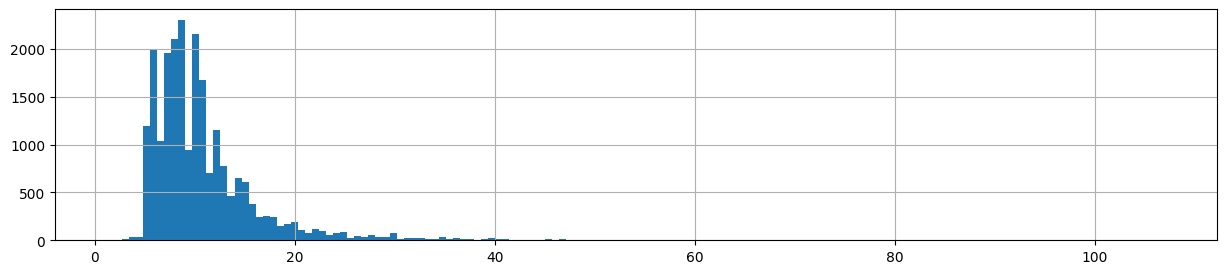

In [56]:
data['kitchen_area'].hist(bins=150, figsize=(15,3));

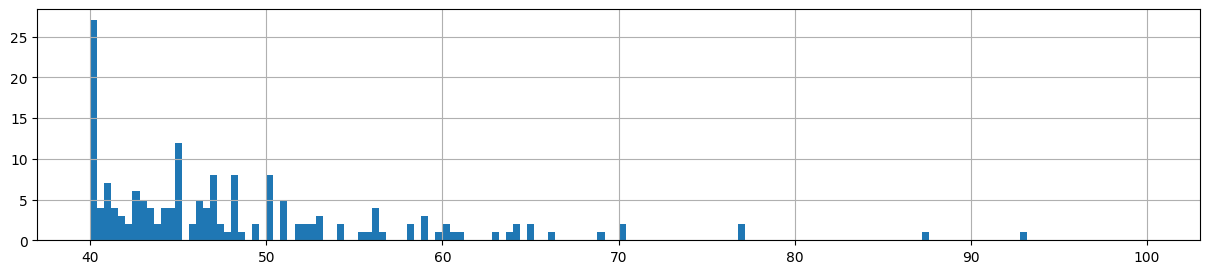

In [57]:
data['kitchen_area'].hist(bins=150, figsize=(15,3), range=(40,100));

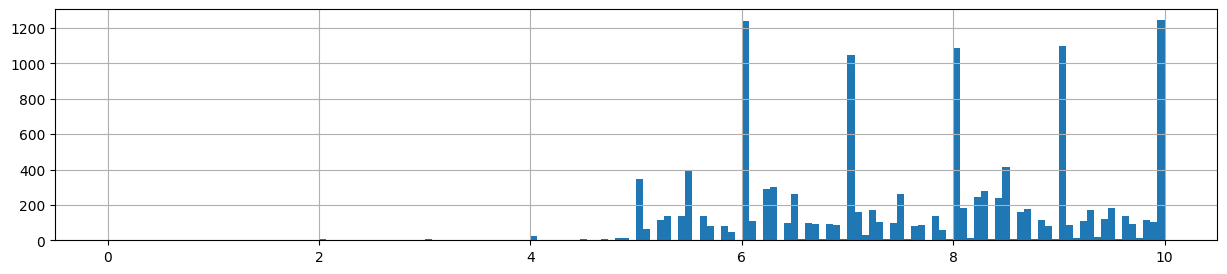

In [58]:
data['kitchen_area'].hist(bins=150, figsize=(15,3), range=(0,10));

In [59]:
# Удалим из датасета все строки с площадью кухни меньше 5 и больше 65-ти кв. метров:

data = data[(data['kitchen_area'] >= 5) & (data['kitchen_area'] <= 65)]

In [60]:
data['balcony'].value_counts()

0    14514
1     4028
2     3575
5      297
4      179
3       78
Name: balcony, dtype: int64

In [61]:
data['airports_nearest'].value_counts()

37434.0    61
21928.0    32
39946.0    30
44870.0    29
37407.0    27
           ..
24217.0     1
45212.0     1
25308.0     1
33250.0     1
20151.0     1
Name: airports_nearest, Length: 8031, dtype: int64

In [62]:
data['airports_nearest'].sort_values()

21085       0.0
4017     6450.0
12899    6450.0
7778     6914.0
23150    6949.0
          ...  
23682       NaN
23683       NaN
23692       NaN
23695       NaN
23696       NaN
Name: airports_nearest, Length: 22671, dtype: float64

In [63]:
# Посчитаем, сколько раз встречается в датасете значение столбца airports_nearest, равное нулю:

data.loc[(data['airports_nearest'] == 0.0)]['airports_nearest'].count()

1

In [64]:
# Удалим эту строку из датасета:

data = data[(data['airports_nearest'] != 0.0)]

In [65]:
data['cityCenters_nearest'].sort_values()

13694    181.0
1934     287.0
1109     318.0
7726     318.0
11492    318.0
         ...  
23682      NaN
23683      NaN
23692      NaN
23695      NaN
23696      NaN
Name: cityCenters_nearest, Length: 22670, dtype: float64

In [66]:
data['cityCenters_nearest'].value_counts()

8460.0     61
20802.0    31
10720.0    30
8434.0     27
8370.0     26
           ..
26894.0     1
2450.0      1
31182.0     1
32508.0     1
6263.0      1
Name: cityCenters_nearest, Length: 7408, dtype: int64

In [67]:
data['parks_around3000'].value_counts()

0    15014
1     5466
2     1625
3      565
Name: parks_around3000, dtype: int64

In [68]:
data['parks_nearest'].sort_values()

14624    1.0
11949    3.0
22941    4.0
9344     7.0
20193    9.0
        ... 
23688    NaN
23691    NaN
23692    NaN
23695    NaN
23696    NaN
Name: parks_nearest, Length: 22670, dtype: float64

In [69]:
data['ponds_around3000'].value_counts()

0    14013
1     5473
2     1803
3     1381
Name: ponds_around3000, dtype: int64

In [70]:
data['ponds_nearest'].sort_values()

17585    13.0
1548     13.0
9311     16.0
8785     16.0
10358    16.0
         ... 
23688     NaN
23690     NaN
23692     NaN
23695     NaN
23696     NaN
Name: ponds_nearest, Length: 22670, dtype: float64

In [71]:
data['days_exposition'].sort_values()

1632     1.0
16212    2.0
13061    2.0
16053    2.0
4937     3.0
        ... 
23680    NaN
23683    NaN
23684    NaN
23685    NaN
23696    NaN
Name: days_exposition, Length: 22670, dtype: float64

In [72]:
data['days_exposition'].value_counts()

45.0      821
60.0      530
7.0       226
30.0      200
90.0      192
         ... 
1089.0      1
822.0       1
734.0       1
1037.0      1
971.0       1
Name: days_exposition, Length: 1130, dtype: int64

In [73]:
# Проверим, какой строке датасета принадлежит необычно большое значение столбца days_exposition:

data.loc[(data['days_exposition'] == 1147.0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_clear
10706,20,7100000,93.4,2016-02-06,4,2.5,9,63.9,1,False,...,0,Санкт-Петербург,45909.0,18633.0,0,NaN,0,NaN,1147.0,Санкт-Петербург


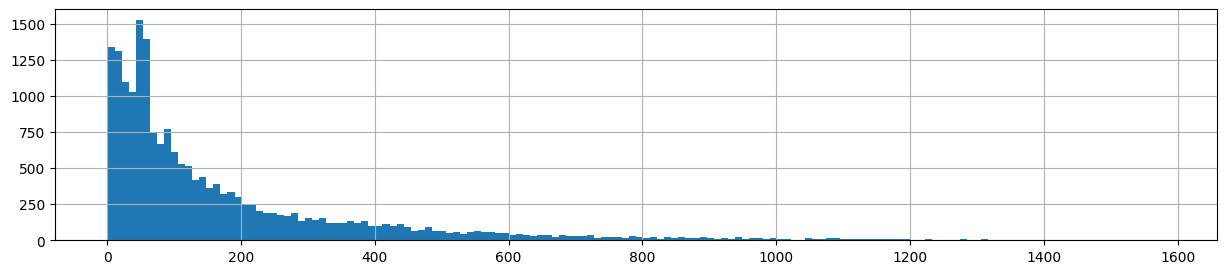

In [74]:
data['days_exposition'].hist(bins=150, figsize=(15,3));

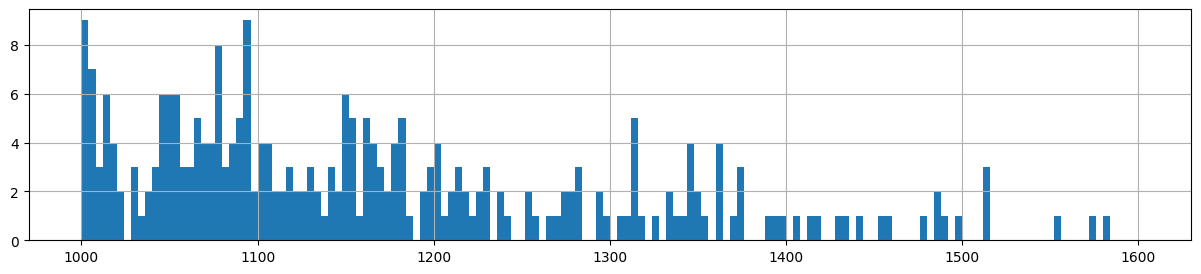

In [75]:
data['days_exposition'].hist(bins=150, figsize=(15,3), range=(1000,1600));

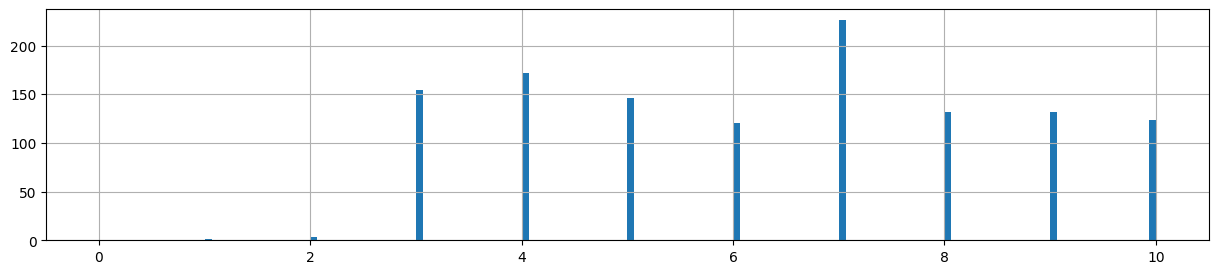

In [76]:
data['days_exposition'].hist(bins=150, figsize=(15,3), range=(0,10));

In [77]:
# Выведем на экран все строки со значением столбца days_exposition больше 1400-т дней:

data[(data['days_exposition'] > 1400)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_clear
521,20,25717300,230.10,2015-01-21,3,2.65,3,130.00,1,False,...,1,Пушкин,16877.0,29030.0,2,676.0,3,278.0,1441.0,Пушкин
1109,1,34878556,95.80,2014-12-09,2,2.65,6,58.30,5,True,...,1,Санкт-Петербург,21860.0,318.0,2,160.0,3,569.0,1572.0,Санкт-Петербург
1885,2,13300000,79.60,2014-12-09,2,3.00,8,42.70,7,False,...,0,Санкт-Петербург,39393.0,11096.0,1,537.0,0,NaN,1513.0,Санкт-Петербург
2941,3,10090000,71.90,2015-02-02,2,2.65,10,34.10,9,False,...,2,Санкт-Петербург,23604.0,5294.0,0,NaN,1,434.0,1458.0,Санкт-Петербург
4736,11,6650000,68.30,2015-02-19,4,2.63,5,45.10,4,False,...,0,Санкт-Петербург,20182.0,1724.0,3,606.0,3,453.0,1477.0,Санкт-Петербург
6006,4,4400000,38.63,2015-02-03,1,2.85,25,15.00,6,False,...,2,посёлок Парголово,52611.0,18783.0,0,NaN,0,NaN,1452.0,Парголово
6691,3,4400000,42.98,2014-12-12,1,2.65,5,18.72,1,False,...,0,Пушкин,19715.0,30358.0,1,439.0,3,232.0,1512.0,Пушкин
6726,6,11995000,83.82,2014-11-27,2,2.73,11,42.31,1,False,...,0,Санкт-Петербург,39946.0,10720.0,1,2102.0,3,303.0,1406.0,Санкт-Петербург
9553,11,10600000,80.00,2014-12-09,3,2.85,17,44.00,9,False,...,0,Санкт-Петербург,17101.0,17110.0,0,NaN,0,NaN,1553.0,Санкт-Петербург
9555,11,9950000,61.20,2015-04-06,2,3.17,7,39.70,2,False,...,0,Санкт-Петербург,9740.0,10123.0,1,114.0,0,NaN,1434.0,Санкт-Петербург


In [78]:
# Выведем на экран все строки со значением столбца days_exposition меньше трех дней:

data[(data['days_exposition'] < 3)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_clear
1632,19,4000000,49.9,2019-05-01,2,2.50,9,25.0,1,False,...,0,Санкт-Петербург,13567.0,14384.0,1,20.0,1,681.0,1.0,Санкт-Петербург
13061,20,6100000,51.4,2019-04-29,2,3.00,5,31.7,4,False,...,1,Санкт-Петербург,10776.0,9389.0,0,NaN,0,NaN,2.0,Санкт-Петербург
16053,4,4070000,45.1,2019-04-30,2,2.65,5,22.7,3,False,...,0,Санкт-Петербург,40859.0,11668.0,2,485.0,0,NaN,2.0,Санкт-Петербург
16212,0,7806000,25.0,2019-04-30,1,3.00,5,15.0,5,False,...,0,Санкт-Петербург,36525.0,10302.0,0,NaN,0,NaN,2.0,Санкт-Петербург


In [79]:
# Удалим из датасета все строки со значением столбца days_exposition больше 1400-т и меньше 3-х дней:

data = data.drop(labels = [521,1109,1885,2941,4736,6006,6691,6726,9553,9555,11955,11985,14093,14873,15313, \
                           18843,19123,20969,20996,1632,13061,16053,16212],axis = 0)

In [80]:
# Выведем информацию об обновленном датасете:

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22647 entries, 0 to 23697
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22647 non-null  int64         
 1   last_price            22647 non-null  int64         
 2   total_area            22647 non-null  float64       
 3   first_day_exposition  22647 non-null  datetime64[ns]
 4   rooms                 22647 non-null  int64         
 5   ceiling_height        22647 non-null  float64       
 6   floors_total          22647 non-null  int64         
 7   living_area           22647 non-null  float64       
 8   floor                 22647 non-null  int64         
 9   is_apartment          22647 non-null  bool          
 10  studio                22647 non-null  bool          
 11  open_plan             22647 non-null  bool          
 12  kitchen_area          22647 non-null  float64       
 13  balcony         

In [81]:
# Проверим число дубликатов в датасете:

data.duplicated().sum()

0

**Вывод:**
Аномальные и выбивающиеся данные были обнаружены в следующих столбцах:

rooms - строки с количеством комнат больше семи удалены, как редкие. Существенная доля строк с нулем комнат принадлежит квартирам-студиям, поэтому данное значение не удалялось;

ceiling_height - в случае значений высот потолков от двадцати метров и выше, логично предположить, что был неверно указан порядок чисел. Данные значения были перемножены на 0.1. Далее, все значения, выходящие за пределы диапазона от 2.5 до 3.5 метров, были удалены, как редкие;

last_price - значения, выходящие за пределы диапазона от одного до ста миллионов рублей, удалены, как редкие;

total_area - значения, выходящие за пределы диапазона от 20 до 250-ти кв. метров, удалены, как редкие;

floors_total - из столбца с общим количеством этажей удалены встречающиеся по одному разу и сильно выбивающиеся из числового ряда два максимальных значения в 52 и 60 этажей;

living_area - значения, выходящие за пределы диапазона от 13 до 160-ти кв. метров, удалены, как редкие;

kitchen_area - значения, выходящие за пределы диапазона от 5 до 65-ти кв. метров, удалены, как редкие;

airports_nearest - удалена встречающаяся один раз строка со значением 0 км, подразумевающая, что жилой дом находится прямо в зоне аэропорта.

days_exposition - значения, выходящие за пределы диапазона от 3 до 1400-т дней, удалены, как редкие.

Общая потеря записей на этапе предобработки составила 4.5%.

### Посчитаем и добавим в таблицу новые столбцы

In [82]:
# Создадим новый столбец price_per_square_meter, разделив значения столбца last_price на значения столбца total_area.
# Округлим полученный результат до сотых:

data['price_per_square_meter'] = round((data['last_price'] / data['total_area']), 2)

In [83]:
# Создадим новый столбец publication_day:

data['publication_day'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

In [84]:
# Создадим новый столбец publication_month:

data['publication_month'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [85]:
# Создадим новый столбец publication_year:

data['publication_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [86]:
# Создадим функцию categorize_floor, чтобы отнести объекты продажи к одной из трех категорий в зависимости от этажа:

def categorize_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [87]:
# Создадим новый столбец floor_category, применив функцию к датасету:

data['floor_category'] = data.apply(categorize_floor, axis=1)

In [88]:
# Создадим новый столбец city_centers_nearest_km, умножив значения столбца cityCenters_nearest на 0.001 и округлив
# полученные значения:

data['city_centers_nearest_km'] = round(data['cityCenters_nearest'] * 0.001)

In [89]:
# Выведем обновленный датафрейм:

data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_clear,price_per_square_meter,publication_day,publication_month,publication_year,floor_category,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755.0,NaN,Санкт-Петербург,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0,NaN,81.0,Шушары,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,2,574.0,558.0,Санкт-Петербург,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.00,2015-07-24,3,2.65,14,95.40,9,False,...,3,234.0,424.0,Санкт-Петербург,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48.0,121.0,Санкт-Петербург,100000.00,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000,30.00,2017-07-07,1,2.65,5,17.50,4,False,...,0,NaN,413.0,Тихвин,45000.00,4,7,2017,другой,NaN
23693,9,4600000,62.40,2016-08-05,3,2.60,9,40.00,8,False,...,1,675.0,239.0,Петергоф,73717.95,4,8,2016,другой,34.0
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.00,4,False,...,0,NaN,45.0,Тосно,52542.37,0,1,2018,другой,NaN
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.70,1,False,...,0,NaN,NaN,Рождествено,44091.71,6,2,2018,первый,NaN


**Вывод:**
В таблицу были добавлены следующие столбцы: цена одного квадратного метра; день недели публикации объявления; месяц публикации объявления;	год публикации объявления;	тип этажа квартиры;	расстояние до центра города в километрах.

### Проведем исследовательский анализ данных

**4.1 Изучение ключевых параметров объектов.**

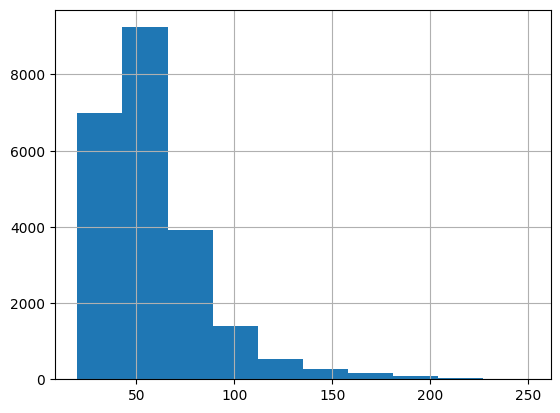

In [90]:
# Построим гистограммы для ключевых параметров:

data['total_area'].hist();

**Комментарий:**
Общая площадь варьируется в диапазоне от двадцати до двухсот пятидесяти квадратных метров. Площадь основного числа квартир не превышает семидесяти квадратных метров. Около четырех тысяч объявлений (почти в четыре раза меньше) лежат в диапазоне 70-130 кв. метров. Значения свыше 130-ти кв. метров крайне малочисленны.

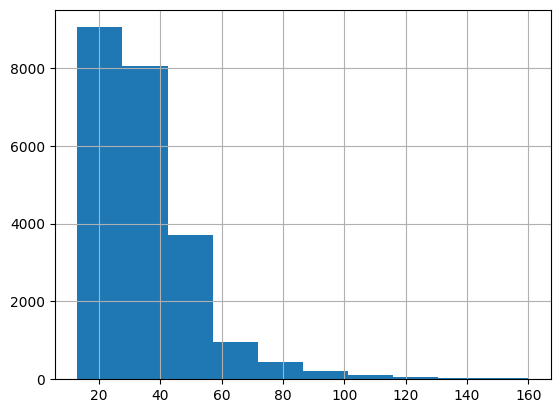

In [91]:
data['living_area'].hist();

**Комментарий:**
Жилая площадь варьируется в диапазоне от тринадцати до ста шестидесяти квадратных метров. Площадь основного числа квартир около сорока квадратных метров. Около 4 тысяч объявлений (примерно в 4 раза меньше) лежат в диапазоне 40-60 кв. метров. Третья по численности группа включает около семисот объявлений и занимает интервал от 60 до 70-ти кв. метров. Значения свыше 70-ти кв. метров крайне малочисленны.

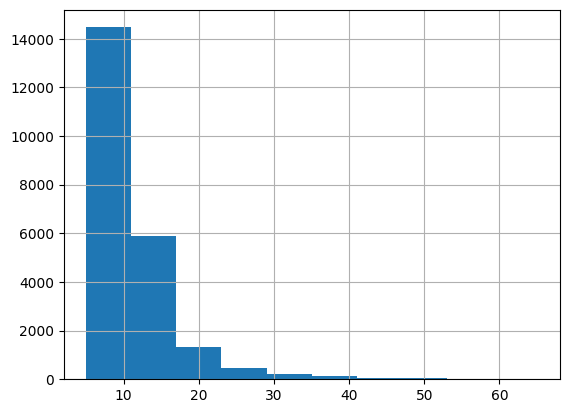

In [92]:
data['kitchen_area'].hist();

**Комментарий:**
Площадь кухни варьируется в приблизительном диапазоне от пяти до шестидесяти пяти квадратных метров. Площадь основного числа кухонь около десяти квадратных метров. Чуть меньше шести тысяч объявлений (в 2.5 раза меньше) лежат в диапазоне 10-16 кв. метров. Следующая группа - около 1.5 тысяч объявлений - от 17 до 22-х кв. метров. Значения свыше 22-х кв. метров крайне малочисленны.

In [93]:
# Создадим более удобно читаемый на гистограмме столбец last_price_hist, перемножив значения столбца last_price на 0.000001:

data['last_price_hist'] = data['last_price'] * 0.000001

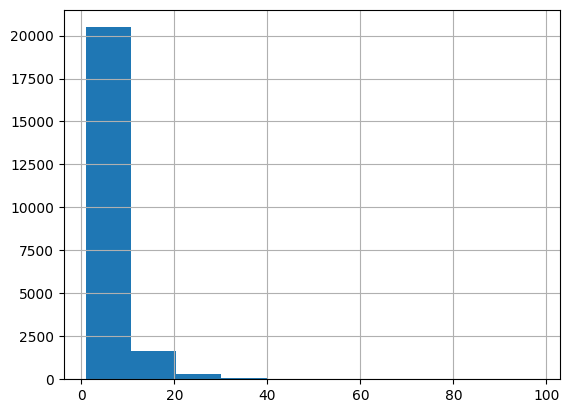

In [94]:
# Построим гистограмму для нового столбца last_price_hist:

data['last_price_hist'].hist();

**Комментарий:**
Хотя цена объектов варьируется в приблизительном диапазоне от одного до ста миллионов рублей, стоимость примерно 90-та процентов квартир не превышает десяти миллионов рублей. В десять раз меньше квартир имеют стоимость от десяти до двадцати миллионов. Значения свыше двадцати миллионов крайне малочисленны.

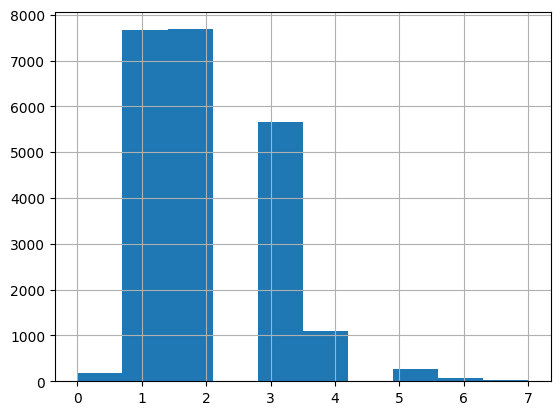

In [95]:
data['rooms'].hist();

**Комментарий:**
Количество комнат варьируется от нуля (квартиры-студии) до семи. Основное число предлагаемых квартир имеет от одной до трех комнат. Однокомнатных и двухкомнатных квартир примерно поровну. Трехкомнатных меньше примерно на двадцать пять процентов. Начиная с четырех комнат, количество объявлений резко снижается, а с пяти - становится крайне малочисленным.

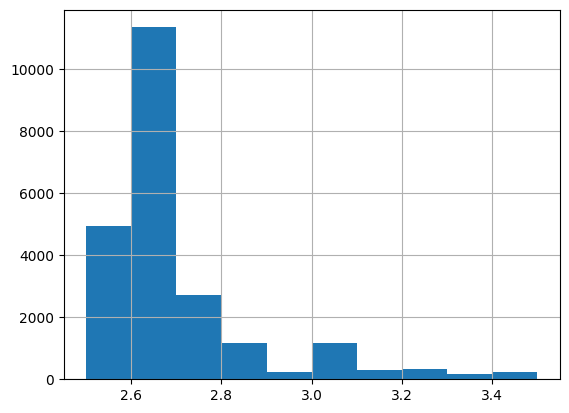

In [96]:
data['ceiling_height'].hist();

**Комментарий:**
Высоты потолков варьируются в приблизительном диапазоне от двух с половиной до трех с половиной метров. Существенная доля квартир имеет потолки высотой от 2.5 до 2.7 метров (пик приходится на 2.6 м). Следующая по величине (в двадцать раз меньшая) группа - это высоты 2.8 и 3 метра. Значения свыше этих крайне малочисленны.

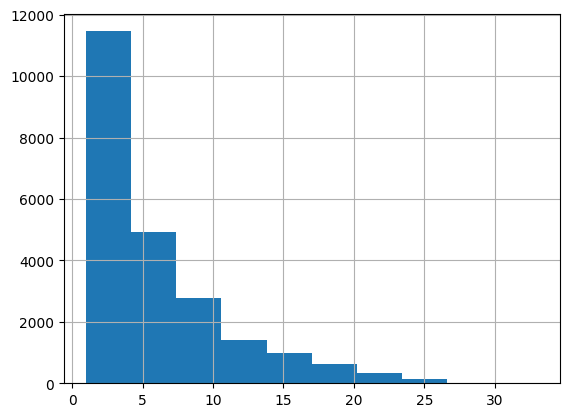

In [97]:
data['floor'].hist();

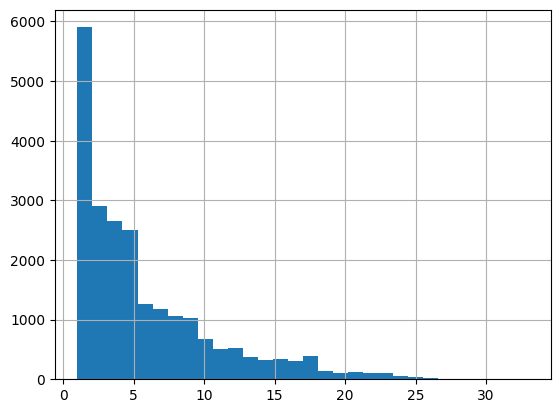

In [98]:
data['floor'].hist(bins=30);

**Комментарий:**
Этажность варьируется от первого до тридцатого. Основная масса квартир расположена на первых четырех этажах. (Пик значений - почти шесть тысяч - приходится на первый этаж.) Вдвое меньше квартир расположено с пятого по восьмой этаж. Еще почти вдвое меньше с девятого по шестнадцатый. В дальнейшем, число объявлений снижается с увеличением этажности таким же ступенчатым образом, пока не достигнет крайне малых значений в области тридцатого этажа.

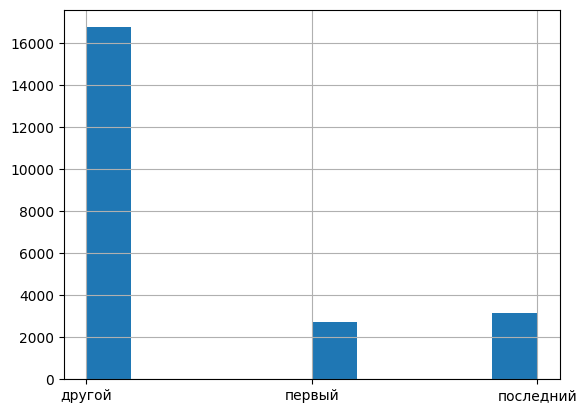

In [99]:
data['floor_category'].hist();

**Комментарий:**
Количество квартир, расположенных на первом и последнем этажах приблизительно равно. Основная часть квартир (примерно в семь раз больше), вполне закономерным образом, занимает диапазон со второго по предпоследний этажи - категория "другой".

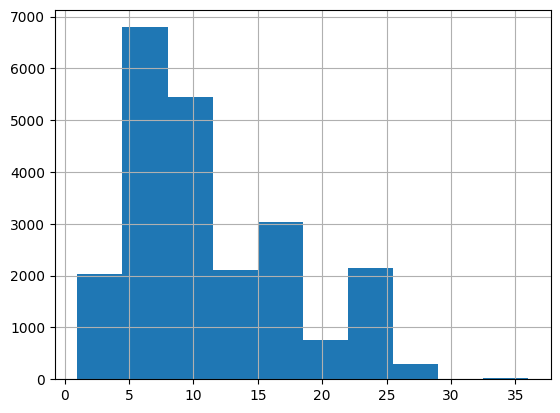

In [100]:
data['floors_total'].hist();

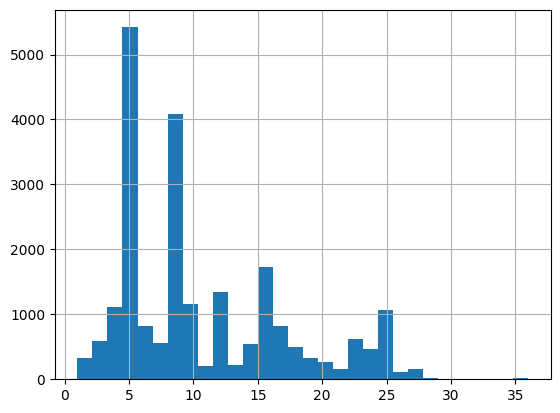

In [101]:
data['floors_total'].hist(bins=30);

**Комментарий:**
Общая этажность зданий, в которых расположены предлагаемые квартиры варьируется от одного до 37-ми. Пиковые значения приходятся на пяти- и девятиэтажки. Также, на графике выделяются двенадцати-, шестнадцати- и двадцатипятиэтажные здания. Среди небольших групп можно отметить 1-4, 6-8 и 16-24 этажей. Число объявлений с общей этажностью зданий более 27-ти - крайне мало.

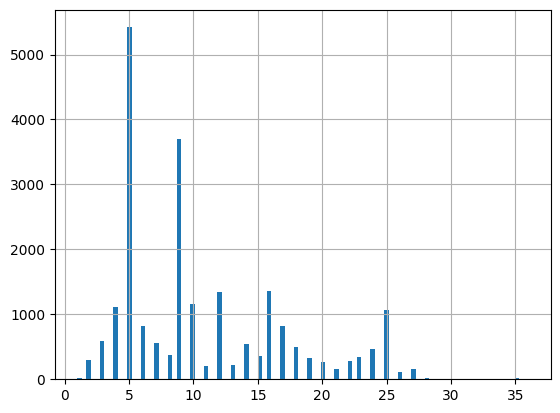

In [102]:
data['floors_total'].hist(bins=100);

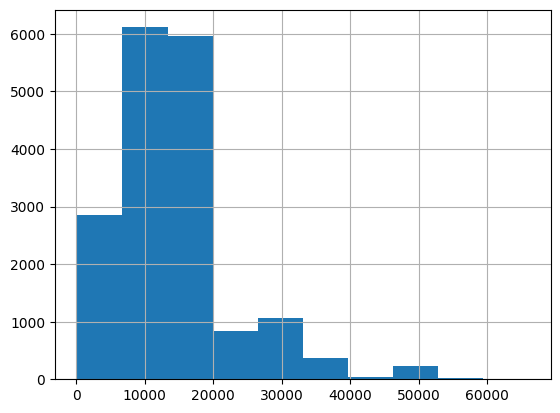

In [103]:
data['cityCenters_nearest'].hist();

**Комментарий:**
Основной блок значений расстояния до центра лежит в диапазоне от нуля до 20000 метров. В него входят три группы. Группы 8000-12000 и 13000-20000 метров почти равны и включают в себя примерно по шесть тысяч объявлений. Третья группа - от нуля до 7000 метров - почти вдвое меньше. Число значений свыше 20000 метров резко снижается еще примерно в три раза и ступенчато сходит до минимальных значений с небольшим пиком в районе 50000 метров.

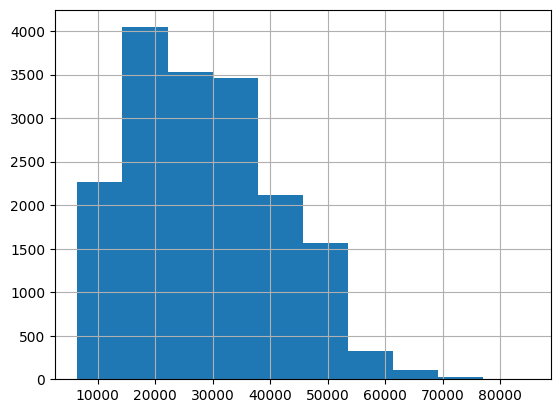

In [104]:
data['airports_nearest'].hist();

**Комментарий:**
Значения близости к аэропорту лежат в диапазоне от пяти до восьмидесяти пяти тысяч метров; основная масса значений - от пяти до шестидесяти тысяч метров. Пиковые значения занимают диапазон 15-22 тысячи метров. На втором по величине месте группа 23-30 тысяч метров. На третьем - 31-37 тысяч. Группы значений 5-14 и 38-45 тысяч метров вдвое меньше третьей группы и приблизительно равны.

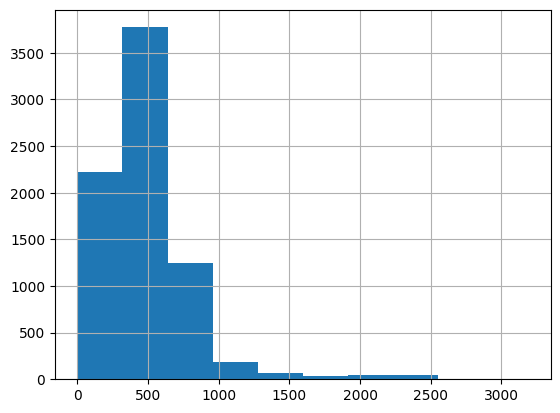

In [105]:
data['parks_nearest'].hist();

**Комментарий:**
Среди значений столбца близости к парковым зонам выделяются три группы. Пиковое значение лежит в диапазоне 350-600 метров. Вторая по величине группа в два раза меньше - от нуля до трехсот метров. Третья группа еще вдвое меньше - 700-950 метров. Расстояния от тысячи метров крайне малочисленны.

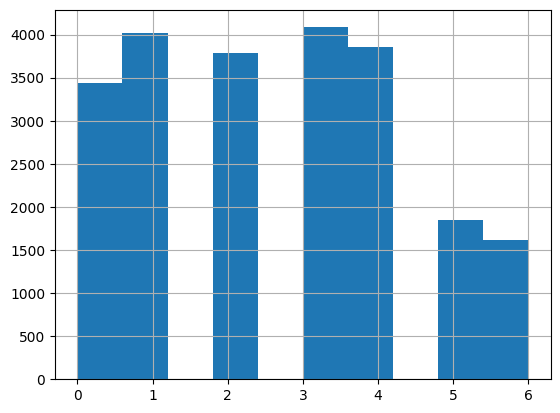

In [106]:
data['publication_day'].hist();

**Комментарий:**
Основная масса объявлений публикуется с понедельника по пятницу. Пик приходится на вторник и четверг. Чуть меньше объявлений публикуется в среду и пятницу. Наименьшее для будних число объявлений публикуется по понедельникам. По выходным объявления публикуются в два раза реже.

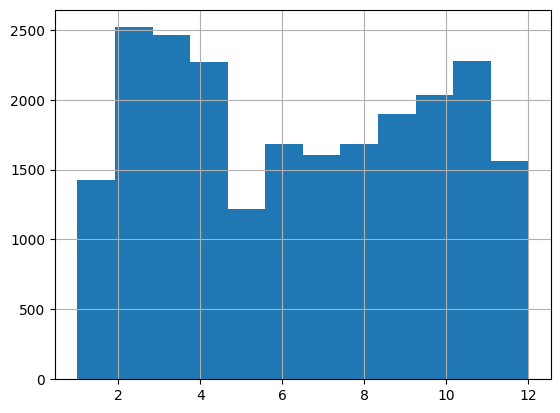

In [107]:
data['publication_month'].hist(bins=12);

**Комментарий:**
Меньше всего объявлений публикуется в конце и начале года - в декабре-январе, а также, в мае. Пиковые значения -  в предшествующий (ноябрь) и последующий (февраль) месяцы, соответственно. Остальные месяцы демонстрируют динамику к плавному снижению числа объявлений к лету с одним исключением в виде резкого падения их числа в мае.

**4.2 Изучим, как быстро продавались квартиры.**

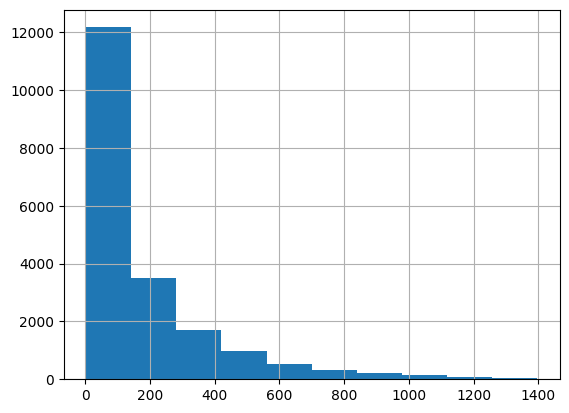

In [108]:
# Построим гистограмму для столбца days_exposition:

data['days_exposition'].hist();

In [109]:
# Определим для него среднее значение:

data['days_exposition'].mean()

178.7860668668261

In [110]:
# И медианное значение:

data['days_exposition'].median()

95.0

**Вывод:**
Исходя из полученных результатов, можно сделать вывод, что на продажу квартиры нужно в среднем около полугода (179 дней). При этом, медианное значение гораздо ниже - всего 95 дней. И действительно, это подтверждается гистограммой выше, демонстрирующей в диапазоне от шестисот до тысячи четырехсот дней примеры квартир с крайне малым числом объявлений, которые оказывают влияние на подсчет среднего значения.

Таким образом, продажи в течение 95-ти дней можно считать быстрыми. А продажи, занимающие более шестисот дней - необычно долгими.

**4.3 Изучим, как цена зависит от ключевых факторов.**

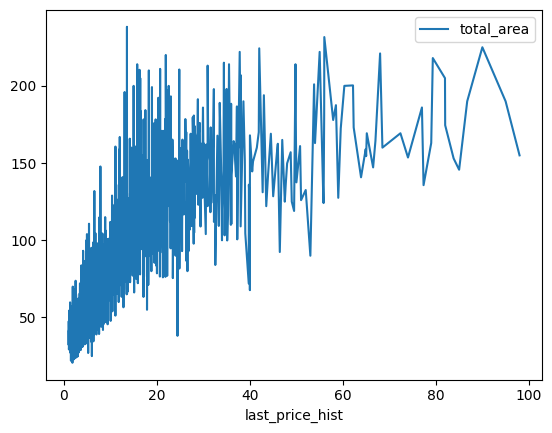

In [111]:
# Создадим сводные таблицы соотношения цены и ключевых параметров и на их основе построим графики зависимости:

data.pivot_table(index='last_price_hist', values='total_area').plot();

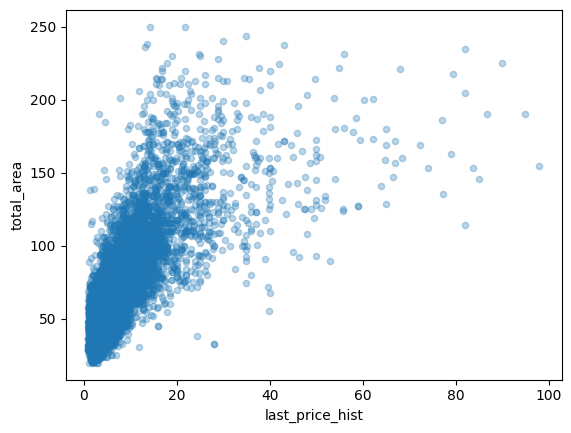

In [112]:
data.plot(x='last_price_hist', y='total_area', kind='scatter', alpha=0.3);

In [113]:
round(data['last_price_hist'].corr(data['total_area']), 2)

0.74

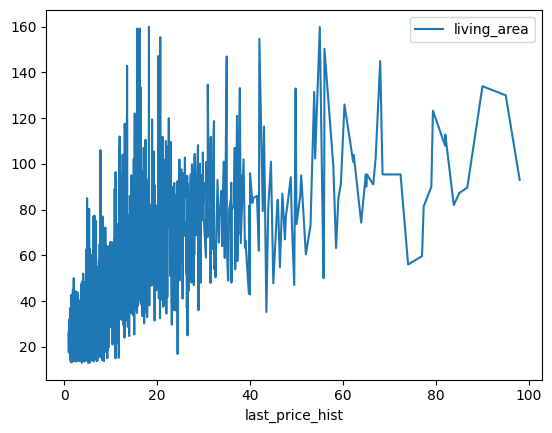

In [114]:
data.pivot_table(index='last_price_hist', values='living_area').plot();

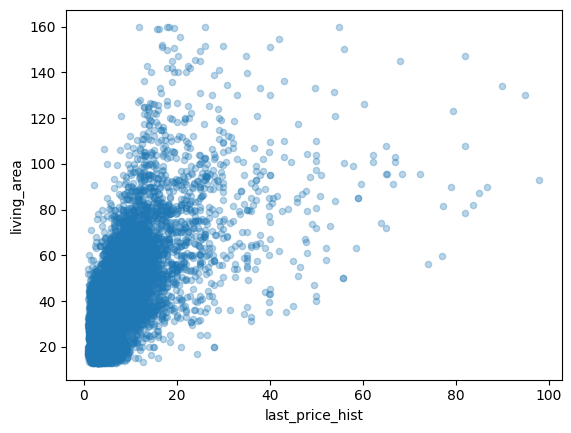

In [115]:
data.plot(x='last_price_hist', y='living_area', kind='scatter', alpha=0.3);

In [116]:
round(data['last_price_hist'].corr(data['living_area']), 2)

0.64

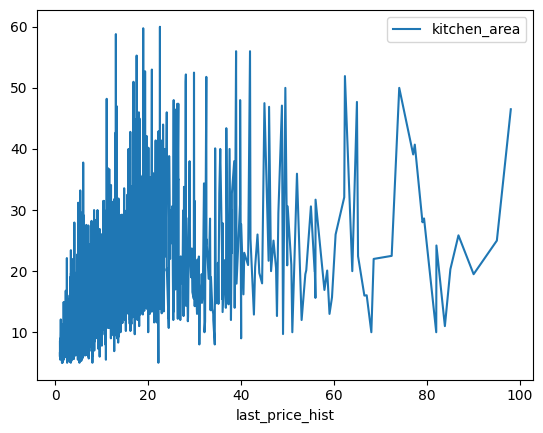

In [117]:
data.pivot_table(index='last_price_hist', values='kitchen_area').plot();

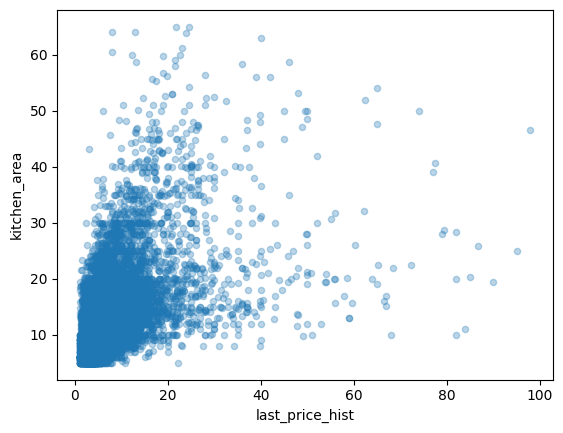

In [118]:
data.plot(x='last_price_hist', y='kitchen_area', kind='scatter', alpha=0.3);

In [119]:
round(data['last_price_hist'].corr(data['kitchen_area']), 2)

0.55

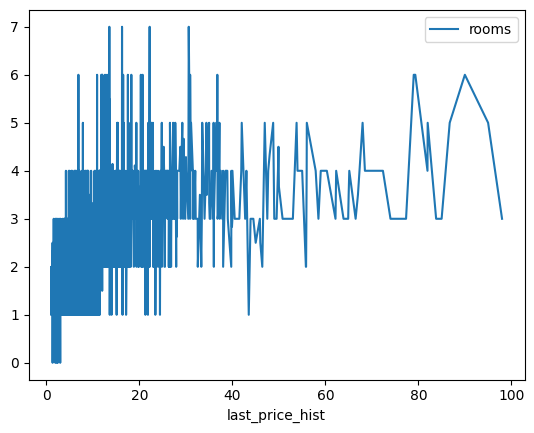

In [120]:
data.pivot_table(index='last_price_hist', values='rooms').plot();

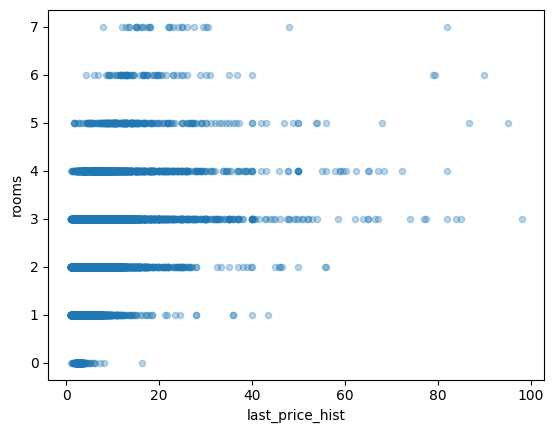

In [121]:
data.plot(x='last_price_hist', y='rooms', kind='scatter', alpha=0.3);

In [122]:
round(data['last_price_hist'].corr(data['rooms']), 2)

0.45

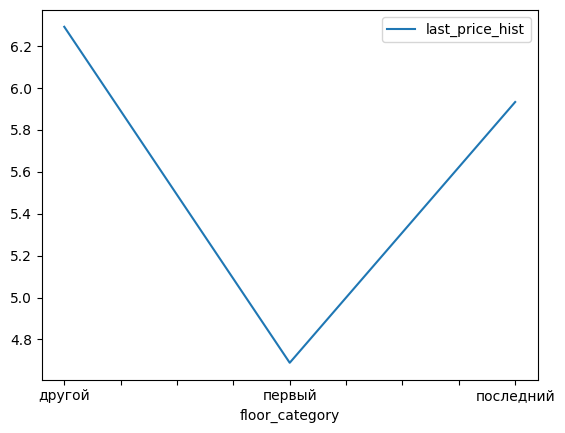

In [123]:
data.pivot_table(index='floor_category', values='last_price_hist').plot();

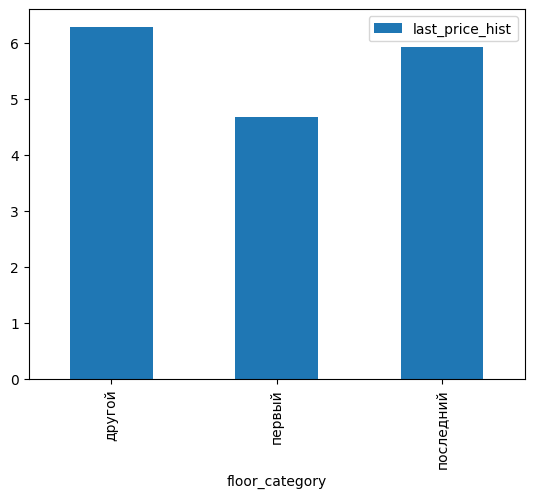

In [124]:
data.pivot_table(index='floor_category', values='last_price_hist').plot(kind='bar');

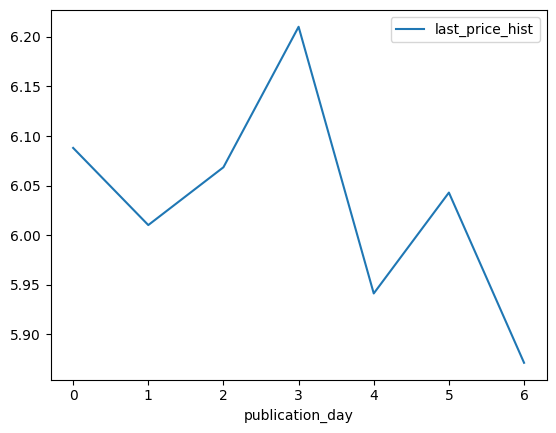

In [125]:
data.pivot_table(index='publication_day', values='last_price_hist').plot();

In [126]:
round(data['last_price_hist'].corr(data['publication_day']), 2)

-0.01

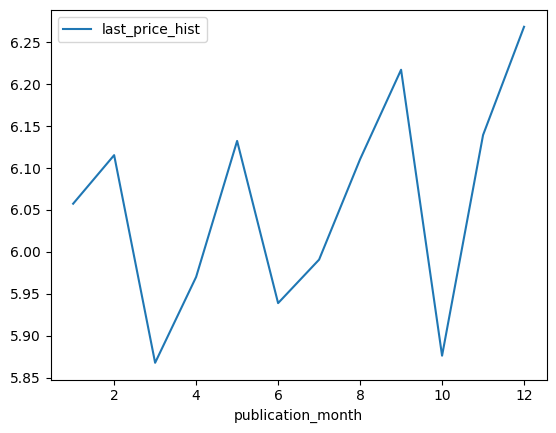

In [127]:
data.pivot_table(index='publication_month', values='last_price_hist').plot();

In [128]:
round(data['last_price_hist'].corr(data['publication_month']), 2)

0.01

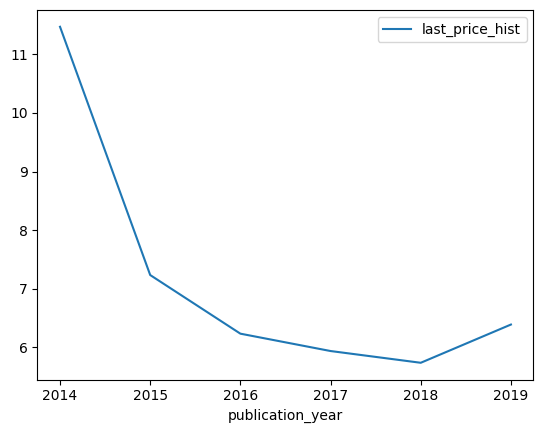

In [129]:
data.pivot_table(index='publication_year', values='last_price_hist').plot();

In [130]:
round(data['last_price_hist'].corr(data['publication_year']), 2)

-0.05

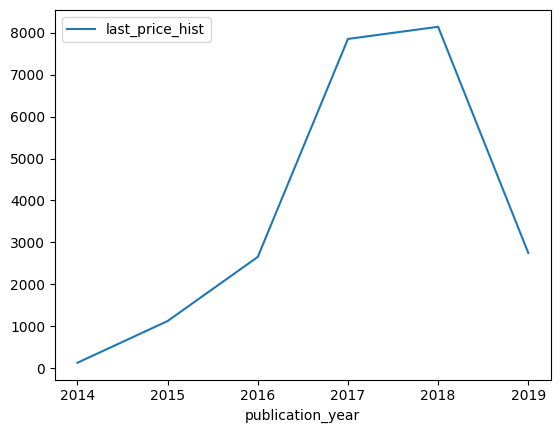

In [131]:
data.pivot_table(index='publication_year', values='last_price_hist', aggfunc='count').plot();

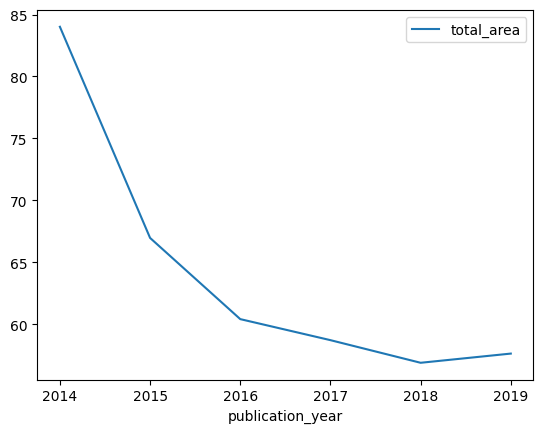

In [132]:
data.pivot_table(index='publication_year', values='total_area').plot();

In [133]:
round(data['total_area'].corr(data['publication_year']), 2)

-0.08

**Вывод:**
Графики зависимости стоимости объекта от общей и жилой площадей, площади кухни и количества комнат ведут себя схожим образом, при высоком разбросе крайних значений все же демонстрируя рост средней цены при росте второго параметра. Данная зависимость соблюдается примерно до показателя цены в двадцать миллионов рублей, после чего значения становятся достаточно редкими, чтобы сформулировать четкую зависимость.

График зависимости стоимости от этажа показывает, что самые дешевые квартиры расположены на первом этаже, а цены на последнем приближаются к стоимости на всех остальных. Надо полагать, за счет включения в исходные данные пентхаусов, а также красивого вида из высотных зданий.

Самые дорогие объекты обычно размещают по понедельникам, четвергам (пиковое значение) и субботам. А самые дешевые - по воскресеньям.
Распределение цен по месяцам происходит волнообразно. Пик приходится на февраль, май, сентябрь и конец года.
С 2014-го года наблюдается плавное снижение стоимости, с небольшим приростом в 2019-м. Почти идентичным образом ведет себя и общая площадь объектов. При этом, число объявлений демонстрирует обратную закономерность: с минимума 2014-го года оно начинает расти и достигает пика в 2017-2018-м годах, а в 2019-м снижается почти втрое. Таким образом, можно заключить, что с 2014-го года ставка, в основном, делалась на увеличение доли доступного жилья и массовую застройку, но в 2019-м вновь появился интерес к более дорогостоящим объектам.

**4.4 Исследуем зависимость цены от населенного пункта.**

In [134]:
# Создадим сводную таблицу соотношения средней цены за квадратный метр от населенного пункта и сохраним в переменную mean_price:

mean_price = data.pivot_table(index='locality_name_clear', values='price_per_square_meter')

# Округлим значения переменной до сотых:

mean_price['price_per_square_meter'] = round(mean_price['price_per_square_meter'], 2)

# Выведем сводную таблицу на экран:

mean_price

,price_per_square_meter
locality_name_clear,
Агалатово,71214.47
Александровская,70262.80
Алексеевка,22222.22
Аннино,63322.64
Аро,51412.42
...,...
Шушары,78113.97
Щеглово,53133.82
Юкки,77948.15


In [135]:
# Определим десять населенных пунктов с наибольшим количеством объявлений и сохраним в переменную top_ten:

top_ten = data['locality_name_clear'].value_counts().head(10)

# Выведем переменную:

top_ten

Санкт-Петербург    15104
Мурино               574
Кудрово              463
Шушары               427
Всеволожск           389
Пушкин               353
Колпино              335
Парголово            315
Гатчина              300
Выборг               223
Name: locality_name_clear, dtype: int64

In [136]:
# Создадим список десяти населенных пунктов с наибольшим количеством объявлений:

localities = [
    ['Санкт-Петербург','15709'],
    ['Мурино','590'],
    ['Кудрово','472'],
    ['Шушары','440'],
    ['Всеволожск','398'],
    ['Пушкин','369'],
    ['Колпино','338'],
    ['Парголово','327'],
    ['Гатчина','307'],
    ['Выборг','237'],
]

# Создадим список с названиями столбцов:

numbers = ['locality_name_clear', 'count']

# И преобразуем в новый датафрейм, который сохраним в переменную top_ten_localities:

top_ten_localities = pd.DataFrame(data=localities , columns=numbers)

# Выведем новый датафрейм на экран:

top_ten_localities

,locality_name_clear,count
0,Санкт-Петербург,15709
1,Мурино,590
2,Кудрово,472
3,Шушары,440
4,Всеволожск,398
5,Пушкин,369
6,Колпино,338
7,Парголово,327
8,Гатчина,307
9,Выборг,237


In [137]:
# Объеденим датафреймы mean_price и top_ten_localities в одну общую таблицу:

top_localities = top_ten_localities.merge(mean_price, on='locality_name_clear', how='left')
top_localities

,locality_name_clear,count,price_per_square_meter
0,Санкт-Петербург,15709,112665.58
1,Мурино,590,85816.99
2,Кудрово,472,95361.16
3,Шушары,440,78113.97
4,Всеволожск,398,68655.61
5,Пушкин,369,102657.66
6,Колпино,338,75372.88
7,Парголово,327,89805.42
8,Гатчина,307,69094.47
9,Выборг,237,58688.31


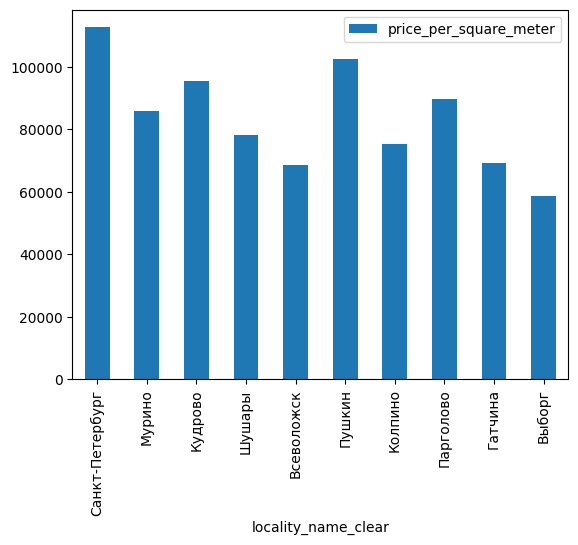

In [138]:
# Выведем десять городов с наибольшим количеством объявлений и среднюю цену за квадратный метр
# в них на экран в виде графика:

top_localities.plot(x='locality_name_clear', kind='bar');

In [139]:
# Сгруппируем в таблицу и, отсортировав ее, определим, какой населенный пункт имеет самую высокую цену за квадратный метр:

data.groupby(['locality_name_clear']).agg({'price_per_square_meter':'max'}).sort_values(by='price_per_square_meter', ascending=False).head(10)

,price_per_square_meter
locality_name_clear,
Санкт-Петербург,848484.85
Всеволожск,640422.35
Зеленогорск,323943.66
Пушкин,256521.74
Петергоф,225971.73
Сестрорецк,182688.17
Репино,175000.00
Лисий Нос,168706.70
Павловск,161428.57


In [140]:
# Сгруппируем в таблицу и, отсортировав ее, определим, какой населенный пункт имеет самую низкую цену за квадратный метр:

data.groupby(['locality_name_clear']).agg({'price_per_square_meter':'min'}).sort_values(by='price_per_square_meter', ascending=True).head(10)

,price_per_square_meter
locality_name_clear,
Гатчина,10507.25
Сланцы,13483.15
Санкт-Петербург,15345.27
Житково,15648.29
Важины,16666.67
Пикалево,17331.02
Каменногорск,17460.32
Луга,17741.94
Никольский,18571.43


**Вывод:**
Была определена средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Самая высокая цена за квадратный метр в Санкт-Петербурге. Самая низкая - в Гатчине.

**4.5 Определим, как стоимость объектов зависит от расстояния до центра Санкт-Петербурга.**

In [141]:
# Создадим новый столбец price_per_kilometer, разделив значения столбца last_price на значения столбца city_centers_nearest_km
# и округлив полученные значения:

data['price_per_kilometer'] = round(data['last_price'] / data['city_centers_nearest_km'])

# Выведем обновленный датафрейм на экран:

data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,locality_name_clear,price_per_square_meter,publication_day,publication_month,publication_year,floor_category,city_centers_nearest_km,last_price_hist,price_per_kilometer
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,NaN,Санкт-Петербург,120370.37,3,3,2019,другой,16.0,13.000,812500.0
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,81.0,Шушары,82920.79,1,12,2018,первый,19.0,3.350,176316.0
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,558.0,Санкт-Петербург,92785.71,3,8,2015,другой,14.0,5.196,371143.0
3,0,64900000,159.00,2015-07-24,3,2.65,14,95.40,9,False,...,424.0,Санкт-Петербург,408176.10,4,7,2015,другой,7.0,64.900,9271429.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,121.0,Санкт-Петербург,100000.00,1,6,2018,другой,8.0,10.000,1250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000,30.00,2017-07-07,1,2.65,5,17.50,4,False,...,413.0,Тихвин,45000.00,4,7,2017,другой,NaN,1.350,NaN
23693,9,4600000,62.40,2016-08-05,3,2.60,9,40.00,8,False,...,239.0,Петергоф,73717.95,4,8,2016,другой,34.0,4.600,135294.0
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.00,4,False,...,45.0,Тосно,52542.37,0,1,2018,другой,NaN,3.100,NaN
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.70,1,False,...,NaN,Рождествено,44091.71,6,2,2018,первый,NaN,2.500,NaN


In [142]:
# Отсортируем значения столбца locality_name_clear для Санкт-Петербурга и сохраним в переменную data_spb:

data_spb = data[(data['locality_name_clear'] == 'Санкт-Петербург')]

# Выведем полученный датасет на экран:

data_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,locality_name_clear,price_per_square_meter,publication_day,publication_month,publication_year,floor_category,city_centers_nearest_km,last_price_hist,price_per_kilometer
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,NaN,Санкт-Петербург,120370.37,3,3,2019,другой,16.0,13.000,812500.0
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,558.0,Санкт-Петербург,92785.71,3,8,2015,другой,14.0,5.196,371143.0
3,0,64900000,159.00,2015-07-24,3,2.65,14,95.40,9,False,...,424.0,Санкт-Петербург,408176.10,4,7,2015,другой,7.0,64.900,9271429.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,121.0,Санкт-Петербург,100000.00,1,6,2018,другой,8.0,10.000,1250000.0
7,5,7915000,71.60,2019-04-18,2,2.65,24,42.96,22,False,...,NaN,Санкт-Петербург,110544.69,3,4,2019,другой,12.0,7.915,659583.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9200000,101.00,2019-04-01,3,3.05,15,63.00,12,False,...,23.0,Санкт-Петербург,91089.11,0,4,2019,другой,14.0,9.200,657143.0
23689,13,3550000,35.30,2018-02-28,1,2.86,15,16.30,4,False,...,29.0,Санкт-Петербург,100566.57,2,2,2018,другой,16.0,3.550,221875.0
23690,3,5500000,52.00,2018-07-19,2,2.65,5,31.00,2,False,...,15.0,Санкт-Петербург,105769.23,3,7,2018,другой,6.0,5.500,916667.0
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.30,7,False,...,519.0,Санкт-Петербург,129903.98,3,10,2016,другой,4.0,9.470,2367500.0


In [143]:
# Заменим все значения типа inf таблицы data_spb на NaN:

data_spb = data_spb.replace([np.inf, -np.inf], np.nan)

In [144]:
# Удалим все строки с NaN в столбце price_per_kilometer из таблицы data_spb:

data_spb = data_spb.dropna(subset=['price_per_kilometer'])

In [145]:
# Определим среднее значение столбца price_per_kilometer и округлим его до целого:

round(data_spb['price_per_kilometer'].mean())

1073310

In [146]:
# Вычислим коэффициент корреляции между значениями столбцов last_price и city_centers_nearest_km:

round(data_spb['last_price'].corr(data_spb['city_centers_nearest_km']), 2)

-0.37

**Вывод:**
Значение коэффициента корреляции между ценой и расстоянием до центра города, равное -0.37, показывает, что связь между двумя этими параметрами (чем ближе к центру, тем дороже) крайне слабая. Нельзя с однозначностью сказать, что близость к центру не влияет на удорожание, но, по всей видимости, у данной связи более сложный, не линейный характер, и на нее оказывают влияние посторонние факторы.

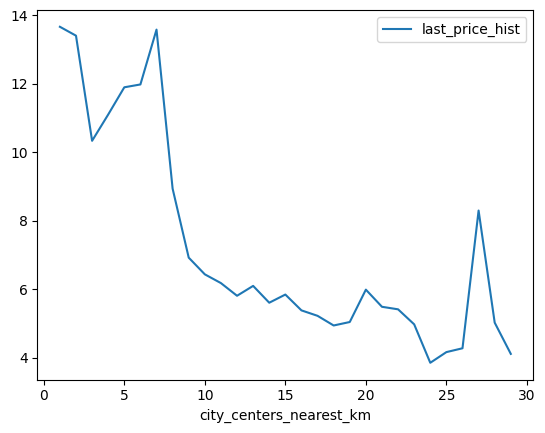

In [147]:
# Создадим график зависимости средней цены объектов в Санкт-Петербурге от удаления от центра:

data_spb.pivot_table(index='city_centers_nearest_km', values='last_price_hist').plot();

In [148]:
# Выведем на экран все строки с удалением в 27 км:

data_spb[(data_spb['city_centers_nearest_km'] == 27)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,locality_name_clear,price_per_square_meter,publication_day,publication_month,publication_year,floor_category,city_centers_nearest_km,last_price_hist,price_per_kilometer
748,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,128.0,Санкт-Петербург,193918.92,1,11,2017,другой,27.0,14.35,531481.0
5961,6,2250000,32.0,2018-02-27,1,2.65,2,16.5,2,False,...,178.0,Санкт-Петербург,70312.50,1,2,2018,последний,27.0,2.25,83333.0


**Вывод:**
Можно предположить, что один из объектов на 27-м километре, стоимость которого превышает 14 миллионов рублей, расположен в Пушкинском районе Санкт-Петербурга, известного своим дворцово-парковым комплексом Царское Село.

In [149]:
# Создадим таблицу для всех объектов, удаленных на три километра:

data_spb_3 = data_spb[(data_spb['city_centers_nearest_km'] == 3)]

In [150]:
# Создадим сводную таблицу с количеством таких объектов для определенной категории этажа:

data_spb_3.pivot_table(index='floor_category', values='total_area', aggfunc='count')

,total_area
floor_category,
другой,184
первый,47
последний,73


In [151]:
# Создадим таблицу для всех объектов, удаленных на пять километров:

data_spb_5 = data_spb[(data_spb['city_centers_nearest_km'] == 5)]

In [152]:
# Создадим сводную таблицу с количеством таких объектов для определенной категории этажа:

data_spb_5.pivot_table(index='floor_category', values='total_area', aggfunc='count')

,total_area
floor_category,
другой,623
первый,74
последний,126


**Вывод:**
Если сравнить данные этажности между 3-м километром, на котором происходит резкий провал стоимости объектов, и 5-м километром, на котором вновь наблюдается ее рост, то можно заметить две закономерности: 1) общее число объектов на 3-м км почти в три раза ниже; 2) больше половины объектов на 3-м км расположены либо на первом, либо на последнем этаже. Это предполагает малоэтажную застройку. И действительно, если взглянуть на карту Санкт-Петербурга, можно заметить, что в радиусе трех километров от центра расположены целых три вокзала. Таким образом, провал в стоимости с высокой вероятностью объясняется расположением существенной части объектов в промзоне.

### Общий вывод

В данном проекте был использован датасет с информацией об объявлениях о продаже недвижимости: дата размещения, стоимость, этаж, тип жилья, удаление от центра города и аэропорта и т.д.

На этапе предобработки были обнаружены и заменены медианными значениями пропуски в столбце ceiling_height. Пропуски в столбце floors_total приравняли к значениям стобца floor. Пропуски в living_area заполнены, как 0.6 от total_area, а в kitchen_area - как 0.3 от total_area. Пропуски в столбце is_apartment были заменены значением False. А пропуски в столбцах balcony, parks_around3000 и ponds_around3000 были заменены нулевым значением. Значения в столбцах last_price, floors_total, balcony, parks_around3000 и ponds_around3000 были заменены целочисленными. Столбец first_day_exposition приведен к более читаемому виду.

Аномальные и выбивающиеся данные были обнаружены в следующих столбцах: rooms - строки с количеством комнат больше семи удалены. ceiling_height - в случае значений высот потолков от двадцати метров и выше были перемножены на 0.1. Значения, выходящие за пределы диапазона от 2.5 до 3.5 метров, были удалены. last_price - значения, выходящие за пределы диапазона от одного до ста миллионов рублей, удалены. total_area - значения, выходящие за пределы диапазона от 20 до 250-ти кв. метров, удалены. living_area - значения, выходящие за пределы диапазона от 13 до 160-ти кв. метров, удалены. kitchen_area - значения, выходящие за пределы диапазона от 5 до 65-ти кв. метров, удалены. floors_total - из столбца с общим количеством этажей удалены встречающиеся по одному разу и сильно выбивающиеся из числового ряда два максимальных значения. airports_nearest - удалена встречающаяся один раз строка со значением 0 км. days_exposition - значения, выходящие за пределы диапазона от 3 до 1400-т дней, удалены. Общая потеря записей на этапе предобработки составила 4.5%.

Отсутствие указанных выше пропусков и аномалий могло бы положительно сказаться на результатах исследования. В текущем виде датасета, рядом строк, в виду малочисленности их значений, пришлось пренебречь.

В результате исследования были получены следующие выводы:

1) Общая площадь основного числа квартир не превышает семидесяти квадратных метров. Жилая - сорока квадратных метров. Площадь основного числа кухонь не превышает десяти квадратных метров. Стоимость примерно 90-та процентов квартир не превышает десяти миллионов рублей. Значения свыше двадцати миллионов крайне малочисленны. Основное число предлагаемых квартир имеет от одной до трех комнат. Однокомнатных и двухкомнатных квартир примерно поровну. Трехкомнатных меньше примерно на двадцать пять процентов. Существенная доля квартир имеет потолки высотой от 2.5 до 2.7 метра. Основная масса квартир расположена на первых четырех этажах. Вдвое меньше квартир расположено с пятого по восьмой этаж. Количество квартир, расположенных на первом и последнем этажах приблизительно равно. Основная часть квартир (примерно в семь раз больше), вполне закономерным образом, занимает диапазон со второго по предпоследний этажи - категория "другой". Общая этажность зданий, в которых расположены предлагаемые квартиры варьируется от одного до 37-ми. Пиковые значения приходятся на пяти- и девятиэтажки. Также, выделяются двенадцати-, шестнадцати- и двадцатипятиэтажные здания. Основной блок значений расстояния до центра лежит в диапазоне от нуля до 20000 метров.Основная масса значений близости к аэропортам - от пяти до шестидесяти тысяч метров. Пиковые значения занимают диапазон 15-22 тысячи метров. Среди значений столбца близости к парковым зонам выделяются три группы. Пиковое значение лежит в диапазоне 350-600 метров. Вторая по величине группа в два раза меньше - от нуля до трехсот метров. Третья группа еще вдвое меньше - 700-950 метров. Расстояния от тысячи метров крайне малочисленны. Основная масса объявлений публикуется с понедельника по пятницу. Пик приходится на вторник и четверг. Чуть меньше объявлений публикуется в среду и пятницу. Наименьшее для будних число объявлений публикуется по понедельникам. По выходным объявления публикуются в два раза реже. Меньше всего объявлений публикуется в конце и начале года - в декабре-январе, а также, в мае. Пиковые значения - в предшествующий (ноябрь) и последующий (февраль) месяцы, соответственно. Остальные месяцы демонстрируют динамику к плавному снижению числа объявлений к лету с одним исключением в виде резкого падения их числа в мае.

2) На продажу квартиры нужно в среднем около полугода (179 дней). При этом, медианное значение гораздо ниже - всего 95 дней. Таким образом, продажи в течение 95-ти дней можно считать быстрыми. А продажи, занимающие болеее шестисот дней - необычно долгими.

3) Графики зависимости стоимости объекта от общей и жилой площадей, площади кухни и количества комнат ведут себя схожим образом, при высоком разбросе крайних значений все же демонстрируя рост средней цены при росте второго параметра. Данная зависимость соблюдается примерно до показателя цены в двадцать миллионов рублей, после чего значения становятся достаточно редкими, чтобы сформулировать четкую зависимость. График зависимости стоимости от этажа показывает, что самые дешевые квартиры расположены на первом этаже, а цены на последнем приближаются к стоимости на всех остальных. Самые дорогие объекты обычно размещают по понедельникам, четвергам (пиковое значение) и субботам. А самые дешевые - по воскресеньям. Распределение цен по месяцам происходит волнообразно. Пик приходится на февраль, май, сентябрь и конец года. С 2014-го года наблюдается плавное снижение стоимости, с небольшим приростом в 2019-м. Почти идентичным образом ведет себя и общая площадь объектов. При этом, число объявлений демонстрирует обратную закономерность. Таким образом, можно заключить, что с 2014-го года ставка, в основном, делалась на увеличение доли доступного жилья и массовую застройку, но в 2019-м вновь появился интерес к более дорогостоящим объектам.

4) Значение коэффициента корреляции ценой и расстоянием до центра города, равное -0.37, показывает, что связь между двумя этими параметрами (чем ближе к центру, тем дороже) крайне слабая. Нельзя с однозначностью сказать, что близость к центру не влияет на удорожание.

5) На графике зависимости средней стоимости объектов от удаления от центра обнаружен провал на 3-м км (обуславливается расположением существенной части объектов в промзоне) и скачок на 27-м (предположительная близость одного из объектов к дворцово-парковому комплексу Царское Село).

Резюмируя, можно сделать вывод, что на рыночную стоимость объекта, в первую очередь, влияют общая площадь, этаж, населенный пункт и расположение относительно его центра. Такие факторы, как количество комнат, соотношение жилой и кухонной площадей, наличие балкона также играют существенную роль и могут оказывать дополнительное воздействие на ценообразование. В третью очередь, сказываются наличие и близость к аэропортам, паркам и прудам. В целом, комплексное взаимодействие всех этих факторов на выходе дает довольно сильный разброс ценовых показателей, образуя систему связей, носящую сложный, не линейный характер.